### Import

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import CSV

In [32]:
df=pd.read_csv('diabetes.csv')

In [33]:
df.shape

(768, 9)

### Preprocessing

#### Missing Value Treatment

In [34]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)

SimpleImputer()

In [35]:
imp.transform(df)

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

#### Select X & Y

In [36]:
X = df.drop(columns=['diabetes'])
X.head()

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
y = df['diabetes']
y[0:5]

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

#### Scale Dataset

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Data Selection

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1, stratify=y)

### KNN Classifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn_model, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print (knn_best)

KNeighborsClassifier(n_neighbors=17)


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf_model, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_best)

RandomForestClassifier(n_estimators=200)


### SVM Classifier

In [43]:
from sklearn import svm
svm_model = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(svm_model, param_grid, refit = True, verbose = 3)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
print(svm_best)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### Voting Classifier

In [44]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('log_reg', log_model), ('rf', rf_best), ('svm', svm_best)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=17)),
                             ('log_reg', LogisticRegression()),
                             ('rf', RandomForestClassifier(n_estimators=200)),
                             ('svm', SVC(C=1, gamma=0.01))])

### Final Output After Tunning

In [45]:
ensemble.score(X_test, y_test)

0.7402597402597403

## Performance Measurement

#### Predicted Values

In [46]:
y_pred_knn = knn_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)
y_pred_log = log_model.predict(X_test)
y_pred_svm = svm_best.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

#### Accuracy Score

In [47]:
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, y_pred_knn)
log_score = accuracy_score(y_test, y_pred_log)
rf_score = accuracy_score(y_test, y_pred_rf)
svm_score = accuracy_score(y_test, y_pred_svm)

ensemble_score = accuracy_score(y_test, y_pred_ensemble)

print("Accuracy score (KNN): ", knn_score)
print("Accuracy score (Logistic): ", log_score)
print("Accuracy score (RF): ", rf_score)
print("Accuracy score (SVM): ", svm_score)
print("Accuracy score (Ensemble): ", ensemble_score)

Accuracy score (KNN):  0.7229437229437229
Accuracy score (Logistic):  0.7619047619047619
Accuracy score (RF):  0.7489177489177489
Accuracy score (SVM):  0.7489177489177489
Accuracy score (Ensemble):  0.7402597402597403


#### Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)
confusion_matrix(y_test, y_pred_log)
confusion_matrix(y_test, y_pred_rf)
confusion_matrix(y_test, y_pred_svm)

ensemble_cf_matrix = confusion_matrix(y_test, y_pred_ensemble)

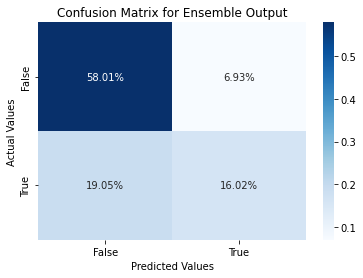

In [49]:
import seaborn as sns
ax = sns.heatmap(ensemble_cf_matrix/np.sum(ensemble_cf_matrix), annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Confusion Matrix for Ensemble Output');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### Precision, Recall and F1 Score

In [50]:
from sklearn.metrics import classification_report
targets = ['No Diabeties','Has Diabeties']
print(classification_report(y_test, y_pred_knn, target_names=targets))
print(classification_report(y_test, y_pred_rf, target_names=targets))
print(classification_report(y_test, y_pred_log, target_names=targets))
print(classification_report(y_test, y_pred_svm, target_names=targets))

print(classification_report(y_test, y_pred_ensemble, target_names=targets))

               precision    recall  f1-score   support

 No Diabeties       0.75      0.86      0.80       150
Has Diabeties       0.64      0.47      0.54        81

     accuracy                           0.72       231
    macro avg       0.70      0.66      0.67       231
 weighted avg       0.71      0.72      0.71       231

               precision    recall  f1-score   support

 No Diabeties       0.77      0.87      0.82       150
Has Diabeties       0.69      0.52      0.59        81

     accuracy                           0.75       231
    macro avg       0.73      0.70      0.71       231
 weighted avg       0.74      0.75      0.74       231

               precision    recall  f1-score   support

 No Diabeties       0.78      0.89      0.83       150
Has Diabeties       0.72      0.53      0.61        81

     accuracy                           0.76       231
    macro avg       0.75      0.71      0.72       231
 weighted avg       0.76      0.76      0.75       231

 

#### ROC Curve & AUROC

/Users/pasanbhanuguruge/Documents/Programming/Python Enviorenments/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/pasanbhanuguruge/Documents/Programming/Python Enviorenments/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/pasanbhanuguruge/Documents/Programming/Python Enviorenments/lib/python3.9/site-packages/s

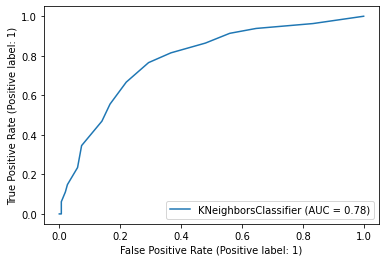

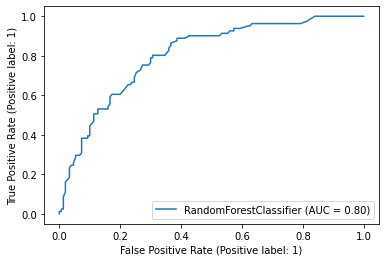

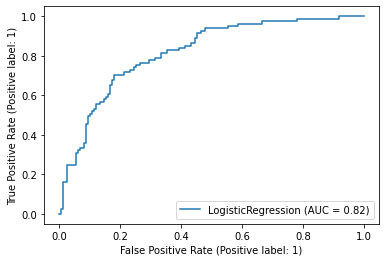

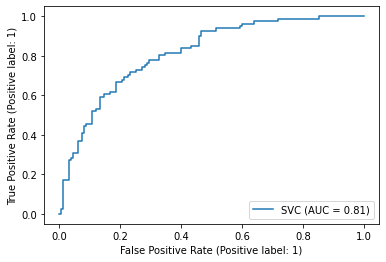

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_best, X_test, y_test)
plot_roc_curve(rf_best, X_test, y_test)
plot_roc_curve(log_model, X_test, y_test)
plot_roc_curve(svm_best, X_test, y_test)